#  ***RESUME CLASSIFICATION***

## ***Business objective:***
###  *The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention*

## ***TEXT EXTRACTION FROM RESUME***

#### ***1.Import Libraries***

In [5]:
import os
import re
import nltk
import spacy
import string
import docx2txt
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [6]:
os.listdir(os.path.expanduser('~/Downloads/Resumes'))

['Peoplesoft resumes',
 'React JS',
 'SQL Developer Lightning insight',
 'workday resumes']

#### ***2. Extract from the Dataset***

In [8]:
file_path1 = []
category1  = []
directory1 = (os.path.expanduser('~/Downloads/Resumes/Peoplesoft resumes'))
for i in os.listdir(directory1):
    if i.endswith('.docx'):                 # or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('Peoplesoft')

In [9]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,Classification: Internal\n\nClassification: In...,Peoplesoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft


In [10]:
file_path2 = []
category2  = []
directory2 = (os.path.expanduser('~/Downloads/Resumes/React JS'))
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS')

In [11]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React JS
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS
8,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS


In [12]:
file_path3 = []
category3  = []
directory3 = (os.path.expanduser('~/Downloads/Resumes/SQL Developer Lightning insight'))
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [13]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer


In [14]:
file_path4 = []
category4  = []
directory4 = (os.path.expanduser('~/Downloads/Resumes/workday resumes'))
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [15]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t ...,Workday
2,G Himaja\n\n ...,Workday
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
5,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
6,Workday HCM Techno functional Consultant ...,Workday
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
8,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
9,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday


#### ***3. Create a Dataframe***

In [17]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,Peoplesoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,NaN,NaN,NaN
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,NaN,NaN,NaN
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,NaN,NaN,NaN
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft,NaN,NaN,NaN
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,NaN,NaN,NaN
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,NaN,NaN,NaN
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,NaN,NaN,NaN


In [18]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


#### ***3.1 Merge all unnecessary column in one Column***

In [20]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
1,Classification: Internal\n\nClassification: In...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,NaN,NaN,NaN,Peoplesoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,NaN,NaN,NaN,Peoplesoft


In [21]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

#### ***3.2 Final Dataset***

In [23]:
resume_data.head(15)

,Category,Raw_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft,Classification: Internal\n\nClassification: In...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


In [24]:
resume_data["Raw_Details"][4]

'PeopleSoft Administration\n\n \n\nVivekanand Sayana                                                                                                                                                                                                           \t\n\n\n\nCareer Objective: \n\n\n\nWith my valid expertise of 7.5 years in PeopleSoft, I hope to enhance my skill set while adding value to the business, to enable implementation of solutions, which aid the company’s objectives, understanding and anticipating the needs, interests and motivations of the clients and to deliver on time, budget and to quality, delivering value through improving agility, quality and reliability\n\n\n\nProfessional Summary:\n\n\n\nOver 7.5 years of experience in PeopleSoft implementation, Support, configuration, migrations, maintenance and administration of Application Server Domains, Process Scheduler Servers, Web Server Domains, PeopleTools Upgrades, Application Updates, PUM, SES and Elastic Search. \n\nE

#### ***3.3 Save New CSV File***

In [26]:
resume_data.to_csv('Raw_Resume.csv', index=False)

#### ***4. Data Understanding***

In [28]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft,Classification: Internal\n\nClassification: In...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


In [29]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
41,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
42,Workday,Name : Gopi Krishna Reddy\n\n\t\t ...
43,Workday,G Himaja\n\n ...
44,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
45,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
46,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
47,Workday,Workday HCM Techno functional Consultant ...
48,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
49,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
50,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...


In [30]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

#### ***4.1 Number of Words in each Resume***

In [32]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,Classification: Internal\n\nClassification: In...,558
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
4,PeopleSoft Administration\n\n \n\nVivekanand S...,2585


#### ***4.2 Number of Characters***

In [34]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,Classification: Internal\n\nClassification: In...,4917
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
4,PeopleSoft Administration\n\n \n\nVivekanand S...,16112


#### ***4.3 Number of Stopwords***

In [36]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,Classification: Internal\n\nClassification: In...,114
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
4,PeopleSoft Administration\n\n \n\nVivekanand S...,520


#### ***4.4 Number of Numerics***

In [38]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,Classification: Internal\n\nClassification: In...,7
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
4,PeopleSoft Administration\n\n \n\nVivekanand S...,17


In [39]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,Peoplesoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8


#### ***5. Text Pre-Processing***

#### ***5.1 Using Regular Expression***

In [42]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [43]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

#### ***5.2 Clean Text From Resume***

In [45]:
resume_data

,Category,Raw_Details,Resume_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...


#### ***5.3 Save the clean data in new CSV file***

In [47]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [48]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Raw_Details,Resume_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...


In [49]:
resume_data.Resume_Details[5]

'hari narayana professional summary years experience peoplesoft application enhancement implementation data conversion support upgrade projects well experienced people tools functional knowledge hcm fscm applications skill people tools application designer application engine people code application packages peoplesoft application fscm hcm applications fscm modules procurement billing hcm modules recruiting performance management waf benefits interfaces component interface file layout languages database oracle sql server operating system windows unix education bachelor technology tech jntu currently working people soft consultant randstad hyderabad relevant experience peoplesoft consultant randstad hyderabad andhra pradesh india june till date project randstad enhancements client randstad staffing responsibilities analyze requirement documents understand customer business requirement provide technical approach fdd assign customize system applications designed many objects scratch write 

#### ***6. Named Entity Recognition (NER)***

In [51]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('hcm', 94), ('support', 94), ('like', 94), ('developer', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('role', 74), ('team', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('professional', 69)]


#### ***7. Parts of Speech (POS) Tagging***

In [53]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [54]:
for token in doc_block[:30]:
    print(token,token.pos_)  

d X
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra VERB
role NOUN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


#### ***7.1 Filtering out only the Nouns and Verbs from the Text to Tokens***

In [56]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'operating', 'system', 'web', 'app', 'servers', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'operating', 'system', 'web', 'app', 'servers', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'scripting', 'managing', 'fscm', 'production', 'environments', 'support', 'environments', 'installed', 'windows', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'tuxedo', 'weblogic', 'middleware', 'cpu', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requ

#### ***7.2 Counting all the Nouns and Verbs present in the Tokens of words***

In [58]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,295
1,using,252
2,application,205
3,project,172
4,reports,170
5,data,170
6,workday,164
7,business,158
8,web,145
9,process,122


#### ***7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently***

In [60]:
import os

# Define the directory and file name
directory = "IMG"
filename = "Top_Nouns_Verbs_Bar.png"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the figure
#fig.savefig(os.path.join(directory, filename), dpi=500)

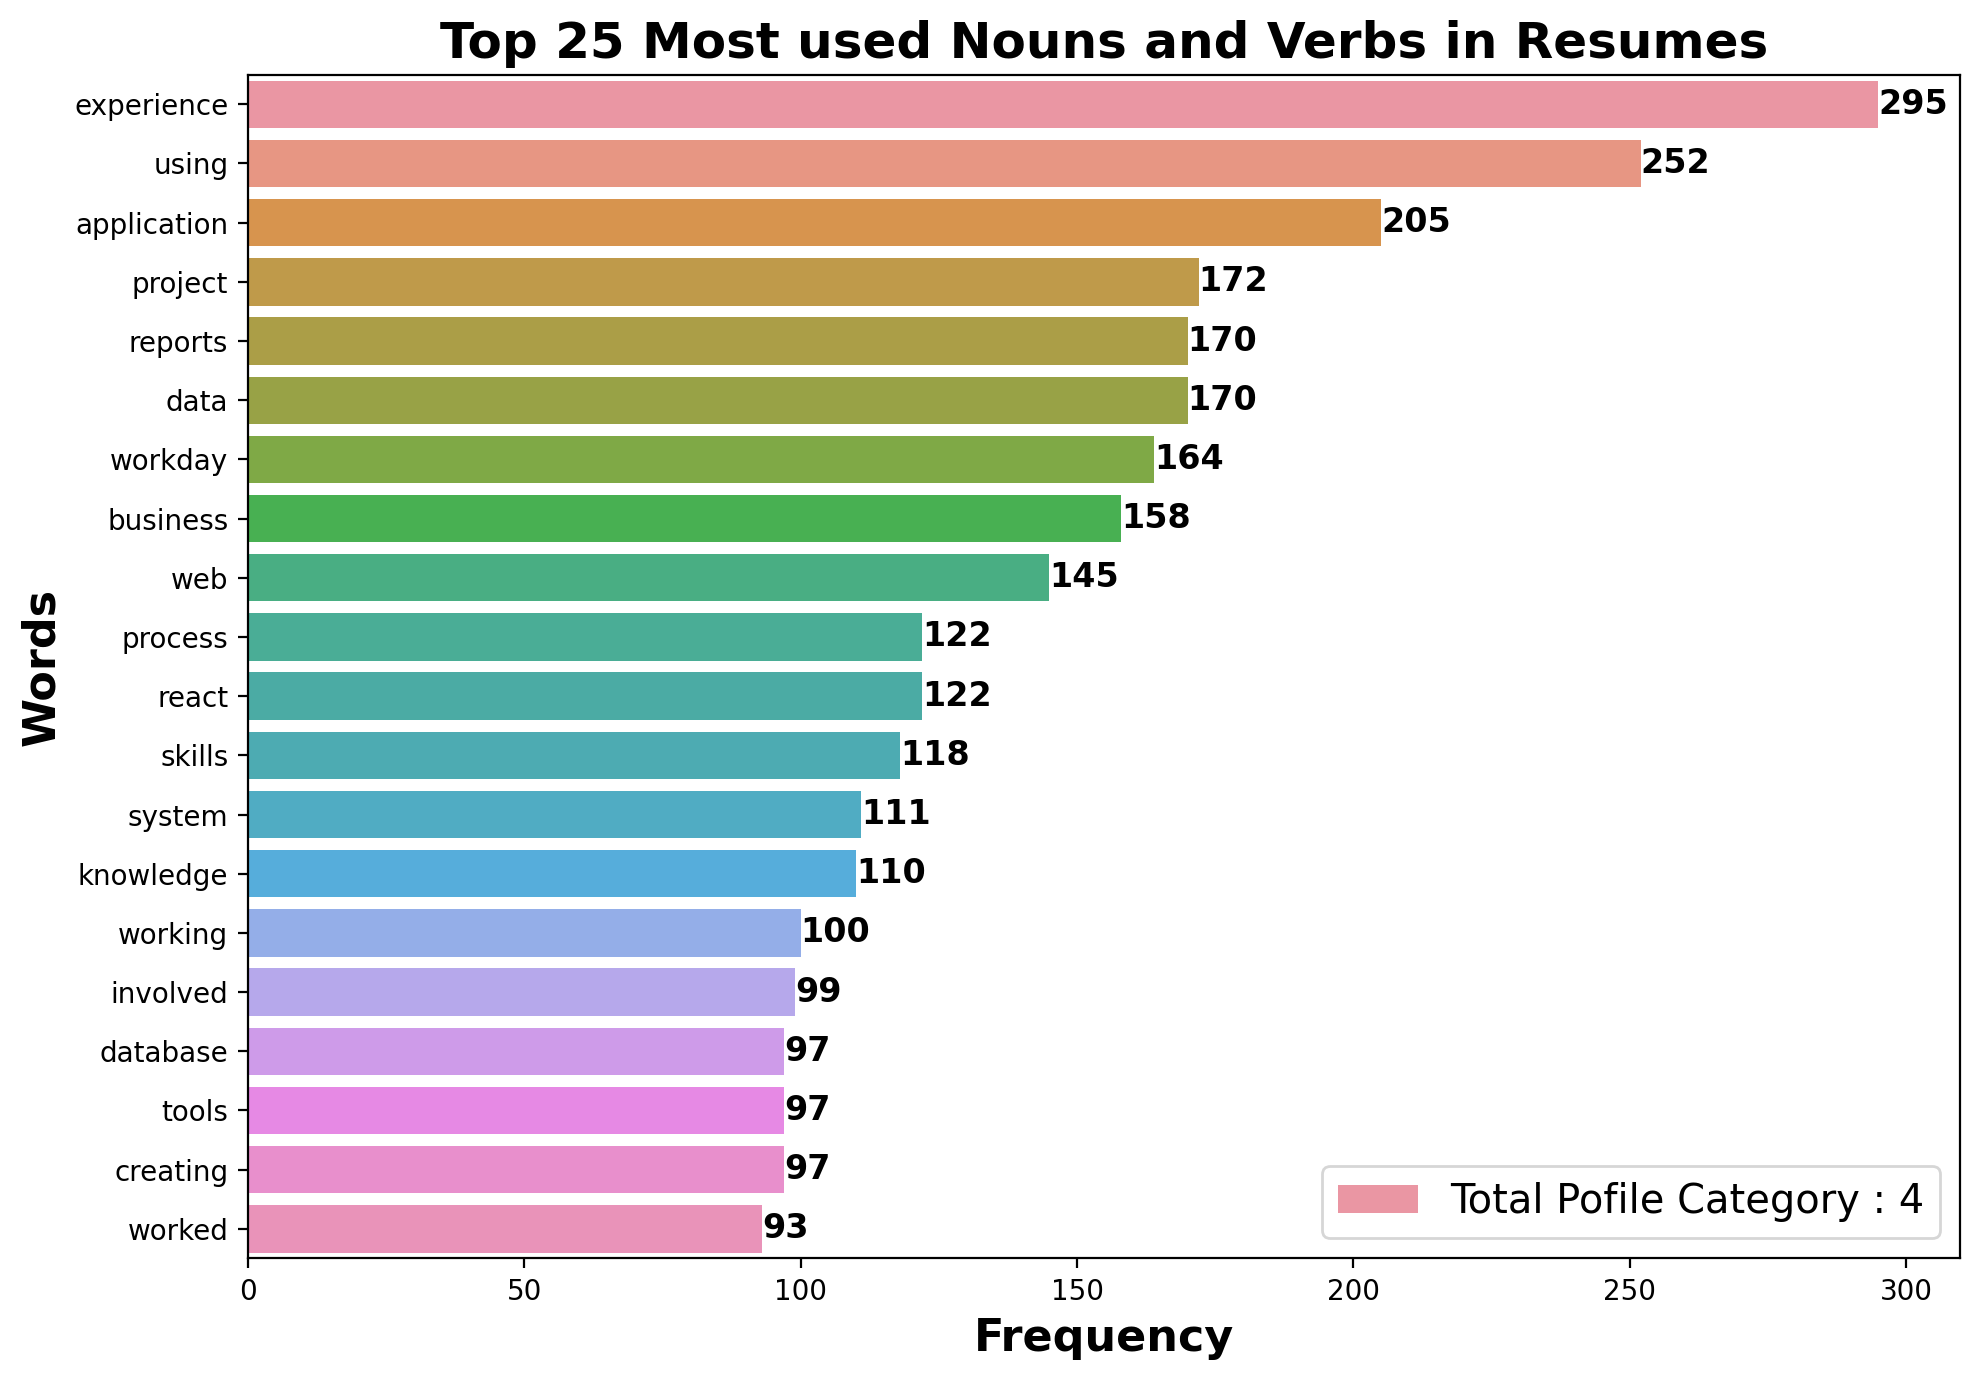

In [61]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Nouns_Verbs_Bar', dpi = 500)

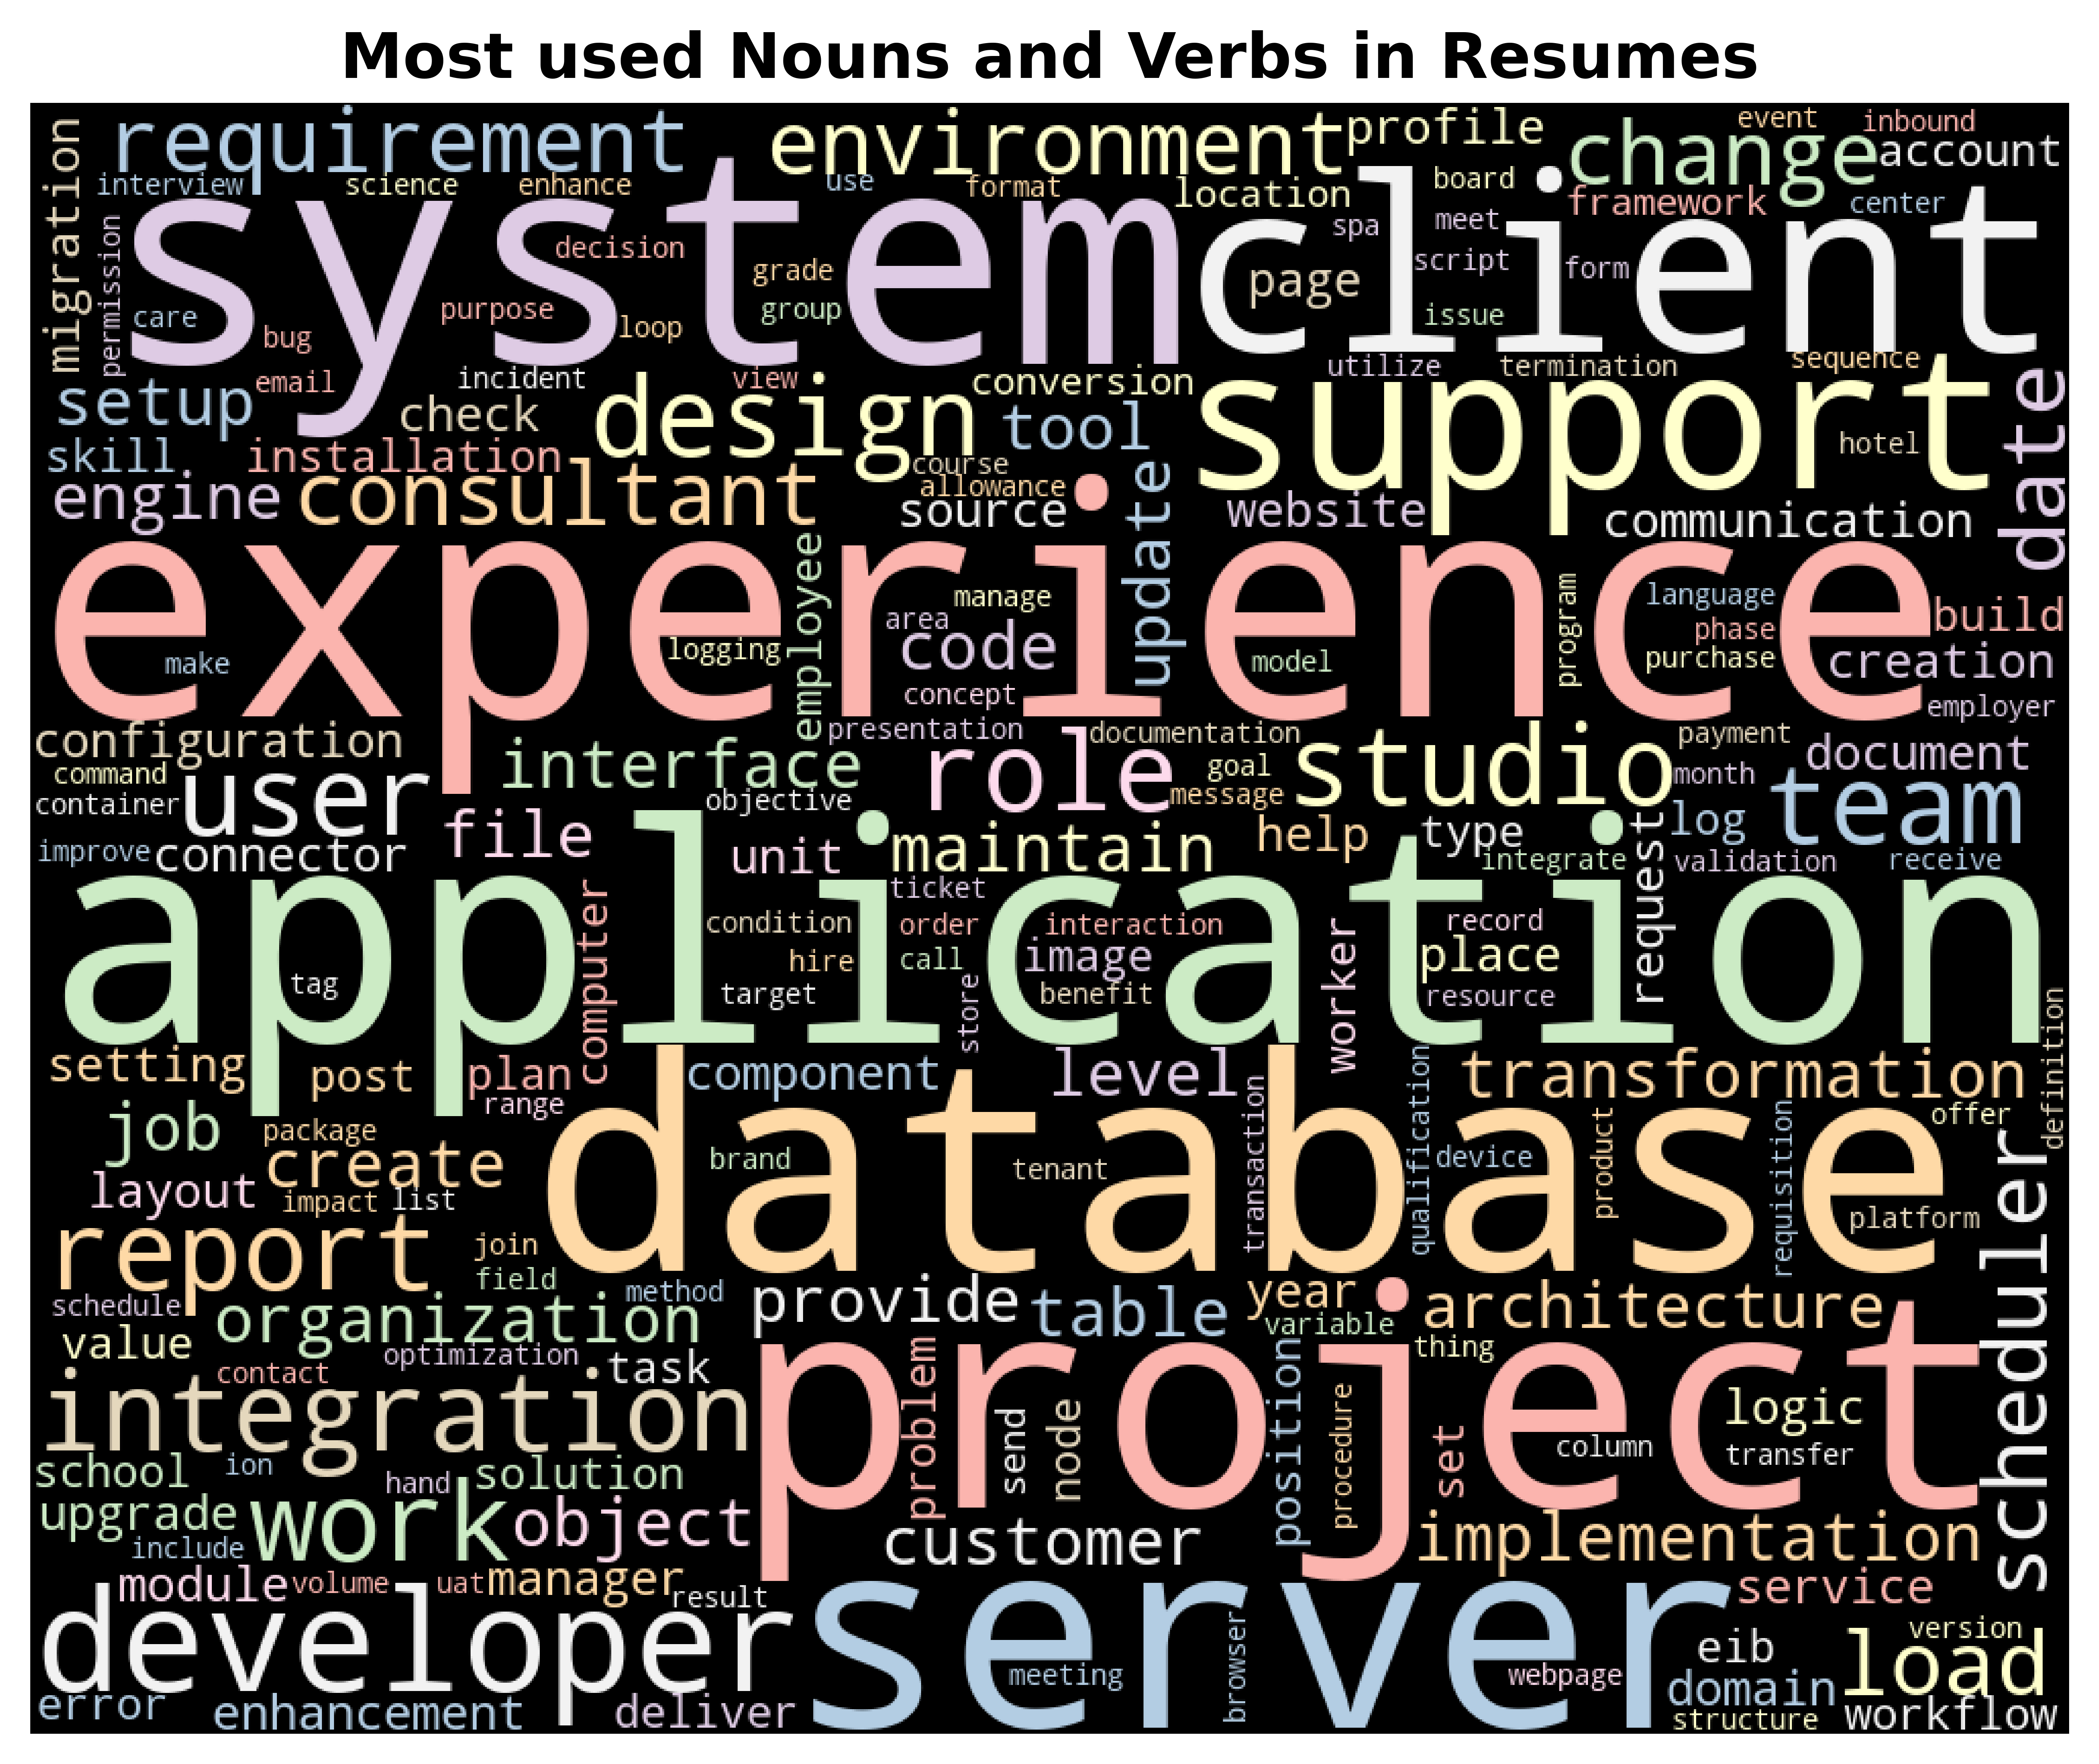

In [62]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds_Noun_Verb.png')
plt.show()

## ***EDA RESUME CLASSIFICATION***

#### ***1. Import Libraries***

In [65]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

#### ***2. About Dataset***

In [67]:
file_path   = r'Resumes/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [68]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [69]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


#### ***2.1 Type of File Format***

In [71]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

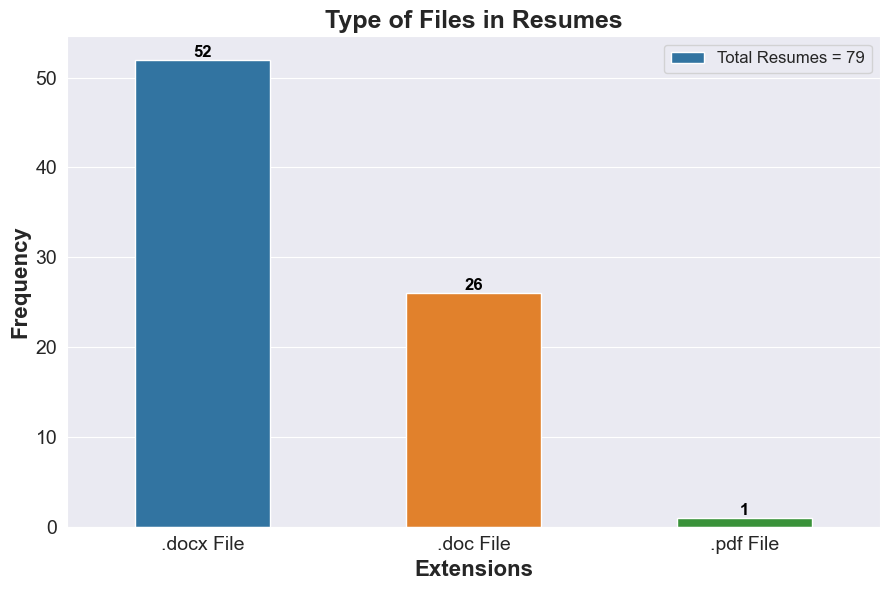

In [72]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

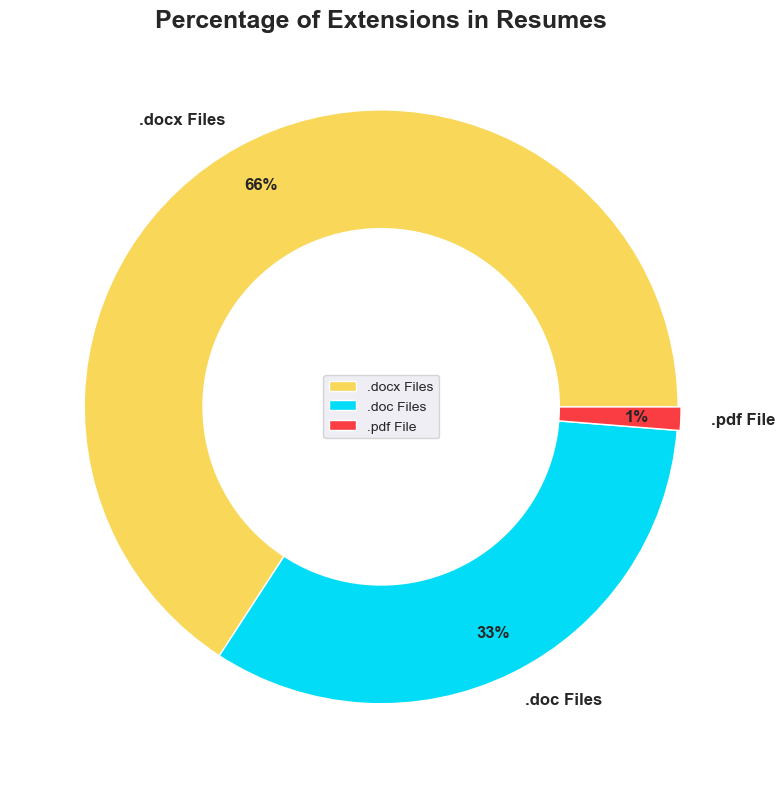

In [73]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

#### ***3. Extract Resumes by Profile Category***

In [75]:
file_path = r'Resumes/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [76]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [77]:
resume_data.Profile.value_counts().index

Index(['React JS', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object')

In [78]:
resume_data.Profile.value_counts()

React JS                           24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Profile, dtype: int64

#### ***3.1 Number of Total Resumes***

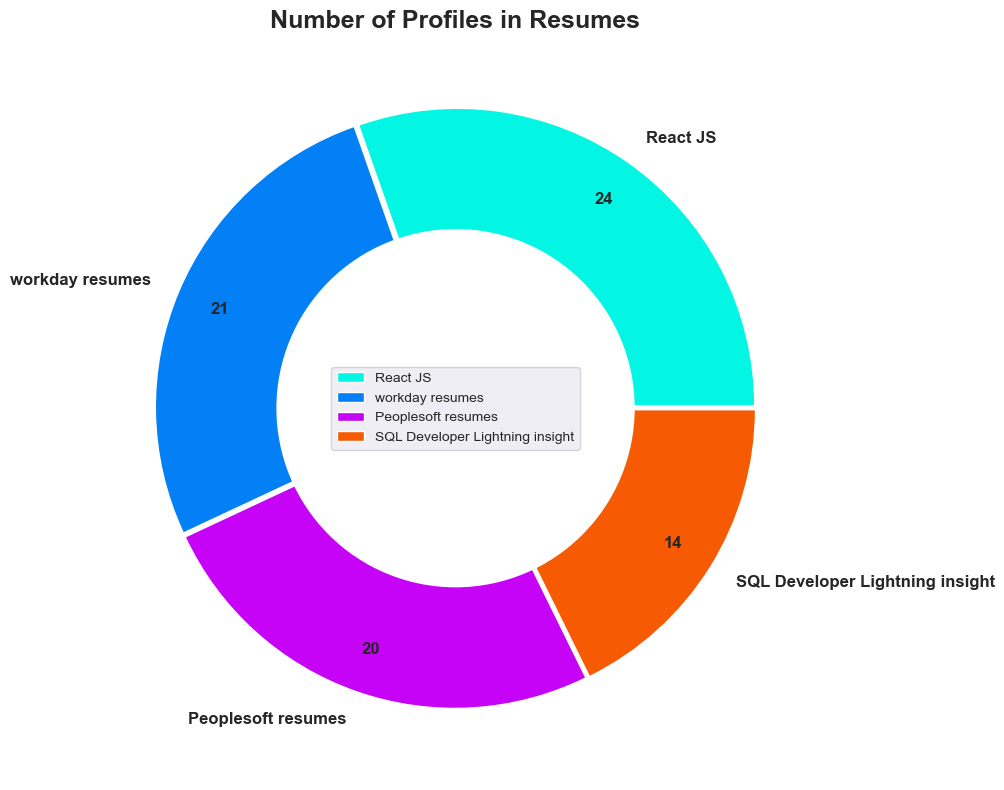

In [80]:
fig = plt.figure(figsize=(10,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Pai', dpi = 500)

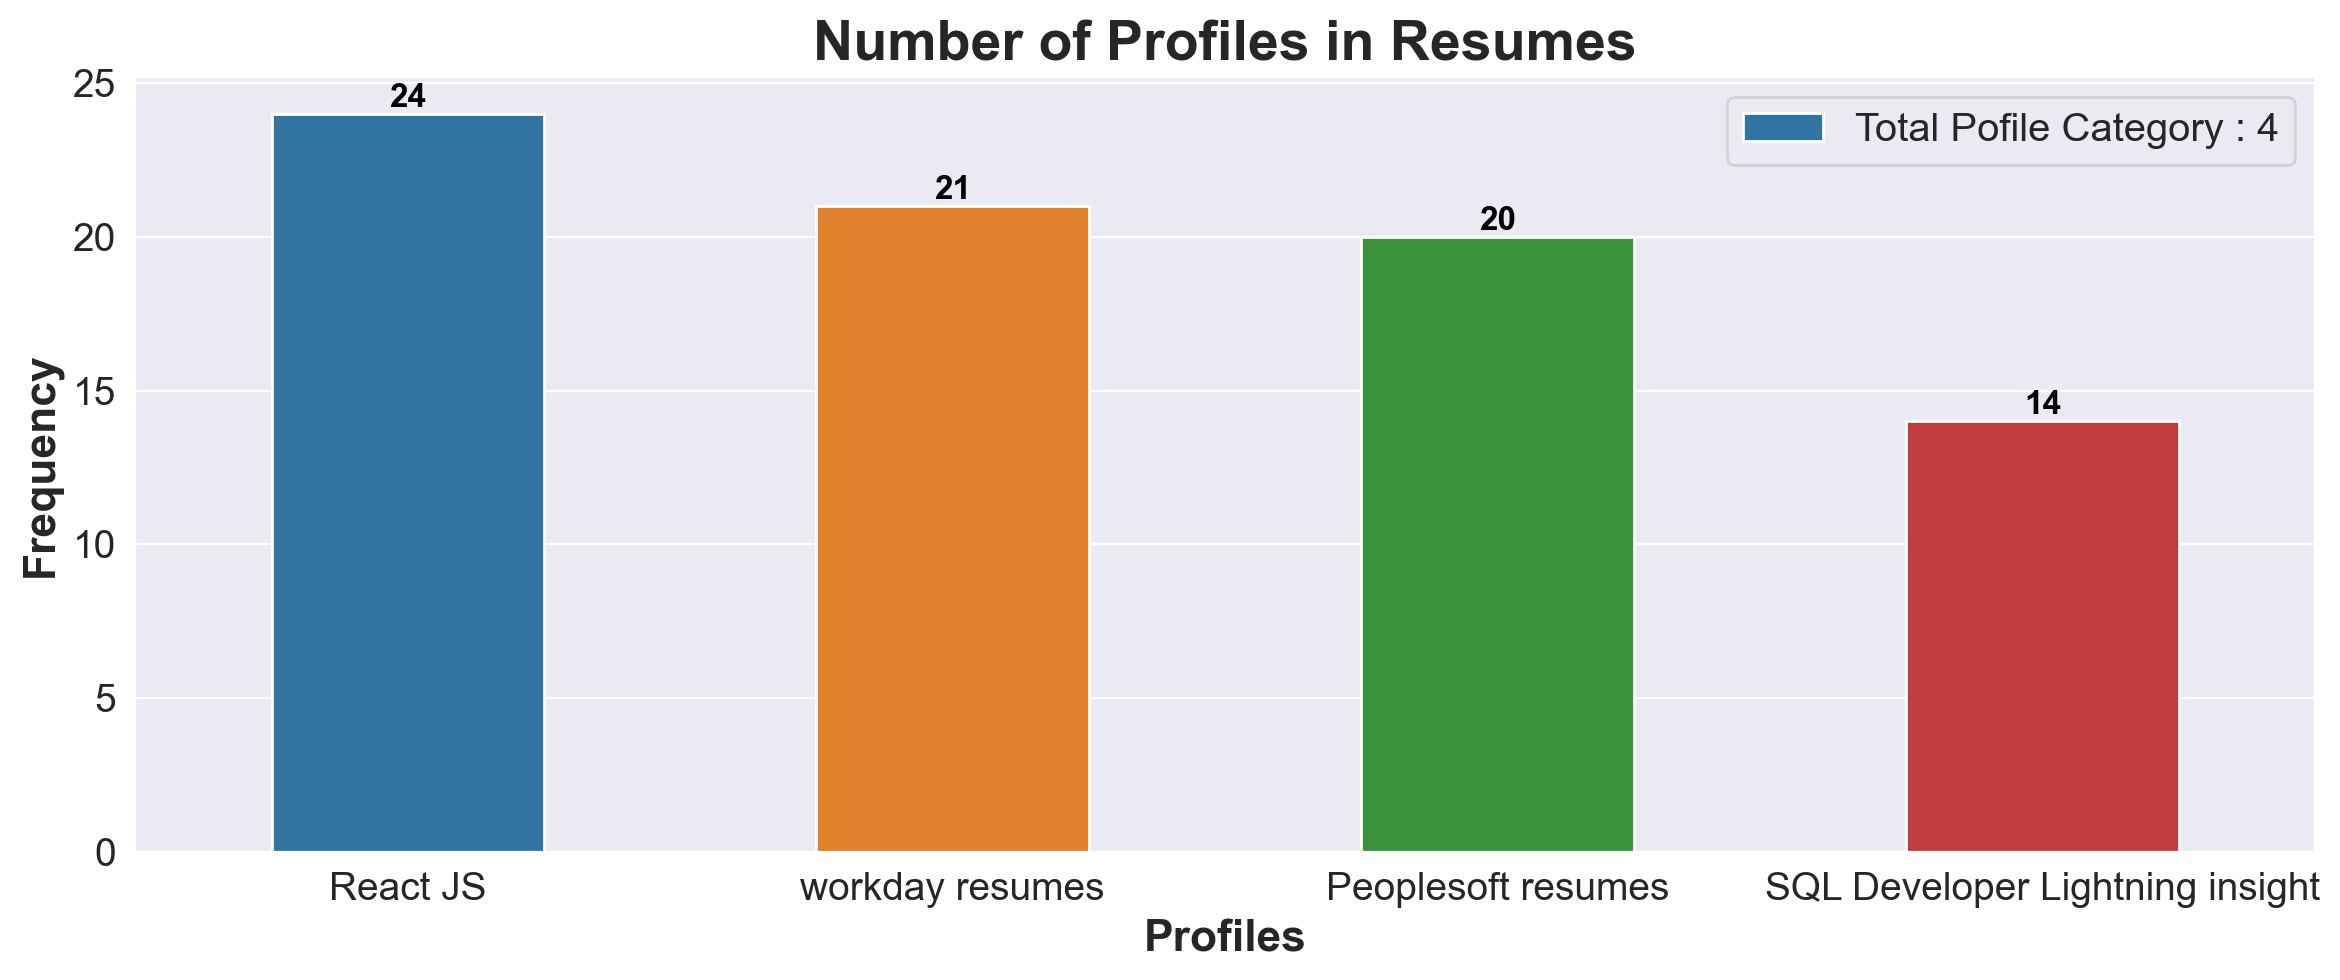

In [81]:
fig, axe = plt.subplots(1,1, figsize=(12,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Bar', dpi = 500)

#### ***Percentage of Profiles Category***

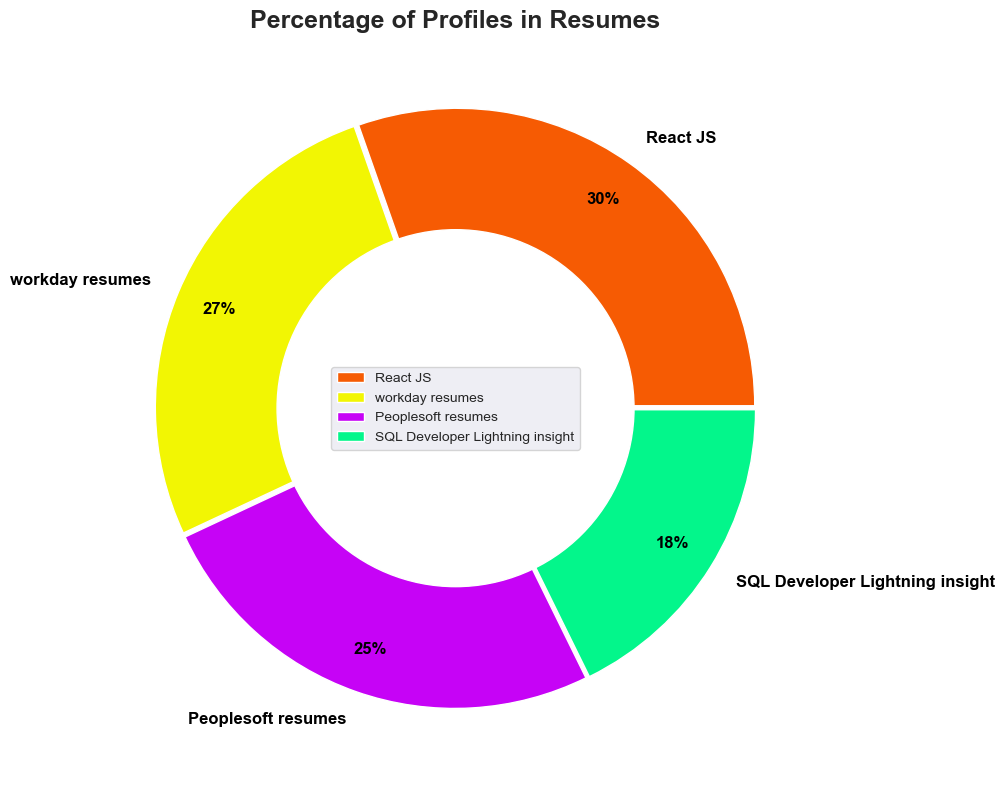

In [83]:
fig = plt.figure(figsize=(10,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Per_Cat_Pai', dpi = 500)

#### ***4. Reading a Resume File***

In [85]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx(r'Resumes\React js\React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

#### ***5. Data Exploration***

In [87]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Raw_Details,Resume_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...


#### ***5.1 N-grams***
* **N-grams analyses are often used to see which words often show up together**

In [89]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['classification']),
 WordList(['internal']),
 WordList(['classification']),
 WordList(['internal']),
 WordList(['murali']),
 WordList(['experience']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['working']),
 WordList(['peoplesoft']),
 WordList(['administration']),
 WordList(['performing']),
 WordList(['various']),
 WordList(['infrastructure']),
 WordList(['related']),
 WordList(['activities']),
 WordList(['peoplesoft']),
 WordList(['environments']),
 WordList(['installed'])]

In [90]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['classification', 'internal']),
 WordList(['internal', 'classification']),
 WordList(['classification', 'internal']),
 WordList(['internal', 'murali']),
 WordList(['murali', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'working']),
 WordList(['working', 'peoplesoft']),
 WordList(['peoplesoft', 'administration']),
 WordList(['administration', 'performing']),
 WordList(['performing', 'various']),
 WordList(['various', 'infrastructure']),
 WordList(['infrastructure', 'related']),
 WordList(['related', 'activities']),
 WordList(['activities', 'peoplesoft']),
 WordList(['peoplesoft', 'environments']),
 WordList(['environments', 'installed']),
 WordList(['installed', 'configured'])]

In [91]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['classification', 'internal', 'classification']),
 WordList(['internal', 'classification', 'internal']),
 WordList(['classification', 'internal', 'murali']),
 WordList(['internal', 'murali', 'experience']),
 WordList(['murali', 'experience', 'summary']),
 WordList(['experience', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'working']),
 WordList(['experience', 'working', 'peoplesoft']),
 WordList(['working', 'peoplesoft', 'administration']),
 WordList(['peoplesoft', 'administration', 'performing']),
 WordList(['administration', 'performing', 'various']),
 WordList(['performing', 'various', 'infrastructure']),
 WordList(['various', 'infrastructure', 'related']),
 WordList(['infrastructure', 'related', 'activities']),
 WordList(['related', 'activities', 'peoplesoft']),
 WordList(['activities', 'peoplesoft', 'environments']),
 WordList(['peoplesoft', 'environments', 'installed']),
 WordList(['environments', 'installed', 

In [92]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     classification internal classification interna...
2     sirazuddin bangalore india sirazuddin bangalor...
3     peoplesoft admin varkala vikas career objectiv...
4     peoplesoft administration vivekanand sayana ca...
5     hari narayana professional summary years exper...
6     murali professional summary years experience p...
7     priyabrata hota career objective pursuing peop...
8     tanna sujatha objective seeking challenging ro...
9     address manyata tech park nagavara bangalore l...
10    name ravali curriculum vitae specialization co...
11    susovan bag seeking challenging position field...
12    kanumuru deepak reddy career objective secure ...
13    haripriya battina experience developer reactjs...
14    kamalakar reddy linked professional summary ye...
15    naveen sadhu title software developer location...
16    pragnya pattnaik expertise around years experi...
17    sarala madasu sarala madasu sri geethika p

#### ***5.2 Top 20 Most used words in Resumes***
* **Using countvectorizer**

In [94]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [95]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,330,experience
1,253,using
2,232,workday
3,213,sql
4,208,application
5,188,server
6,183,project
7,180,data
8,170,reports
9,169,peoplesoft


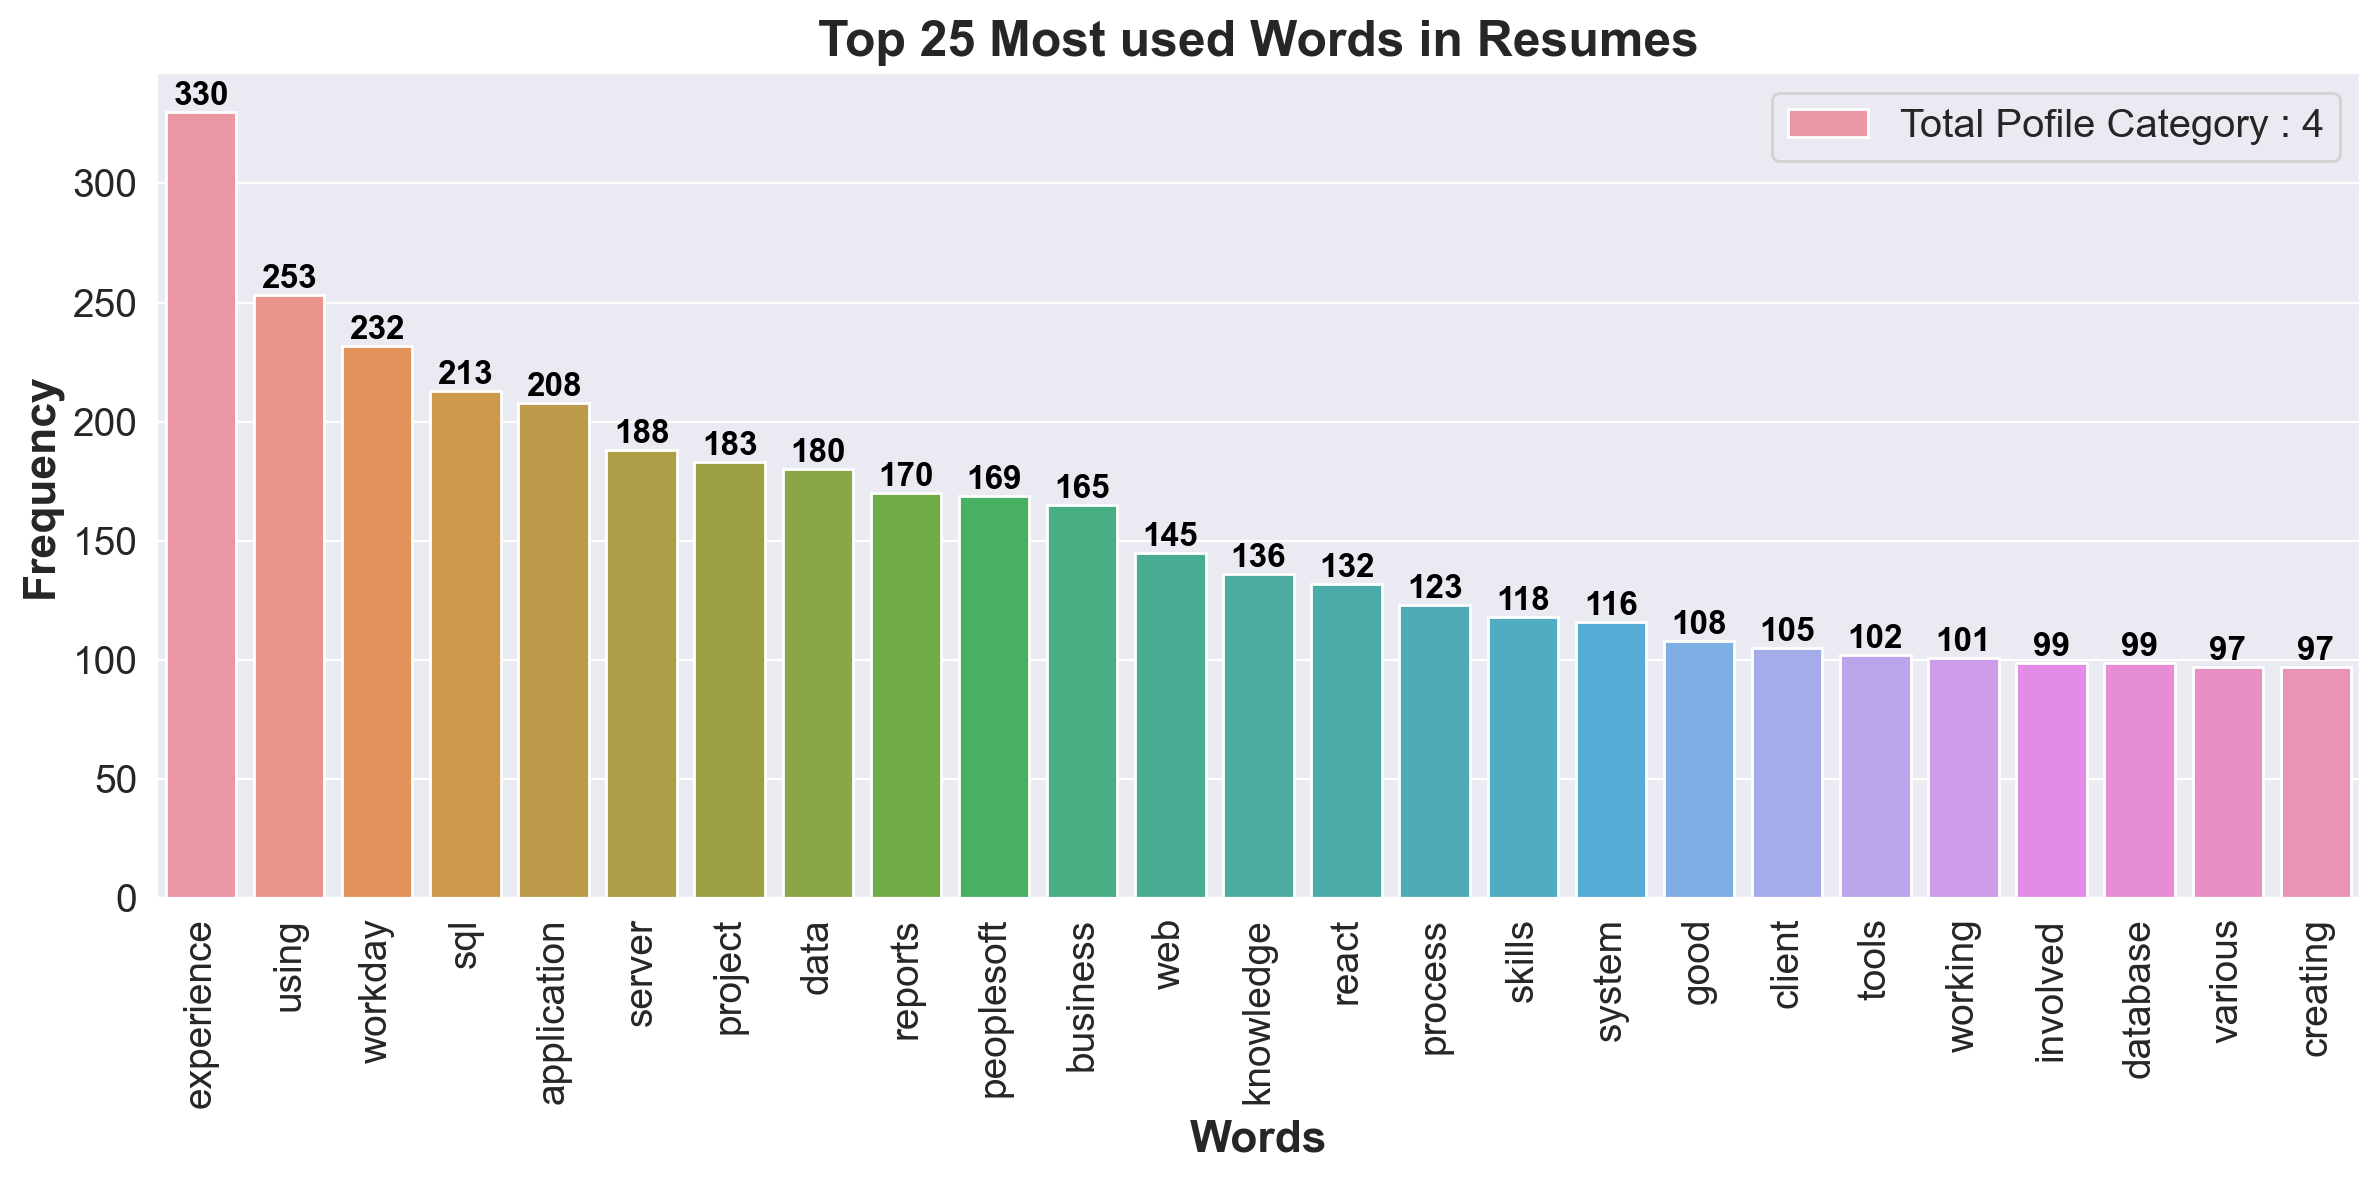

In [96]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Words_Bar', dpi = 500)

#### ***5.4 Using the Word Clowds***

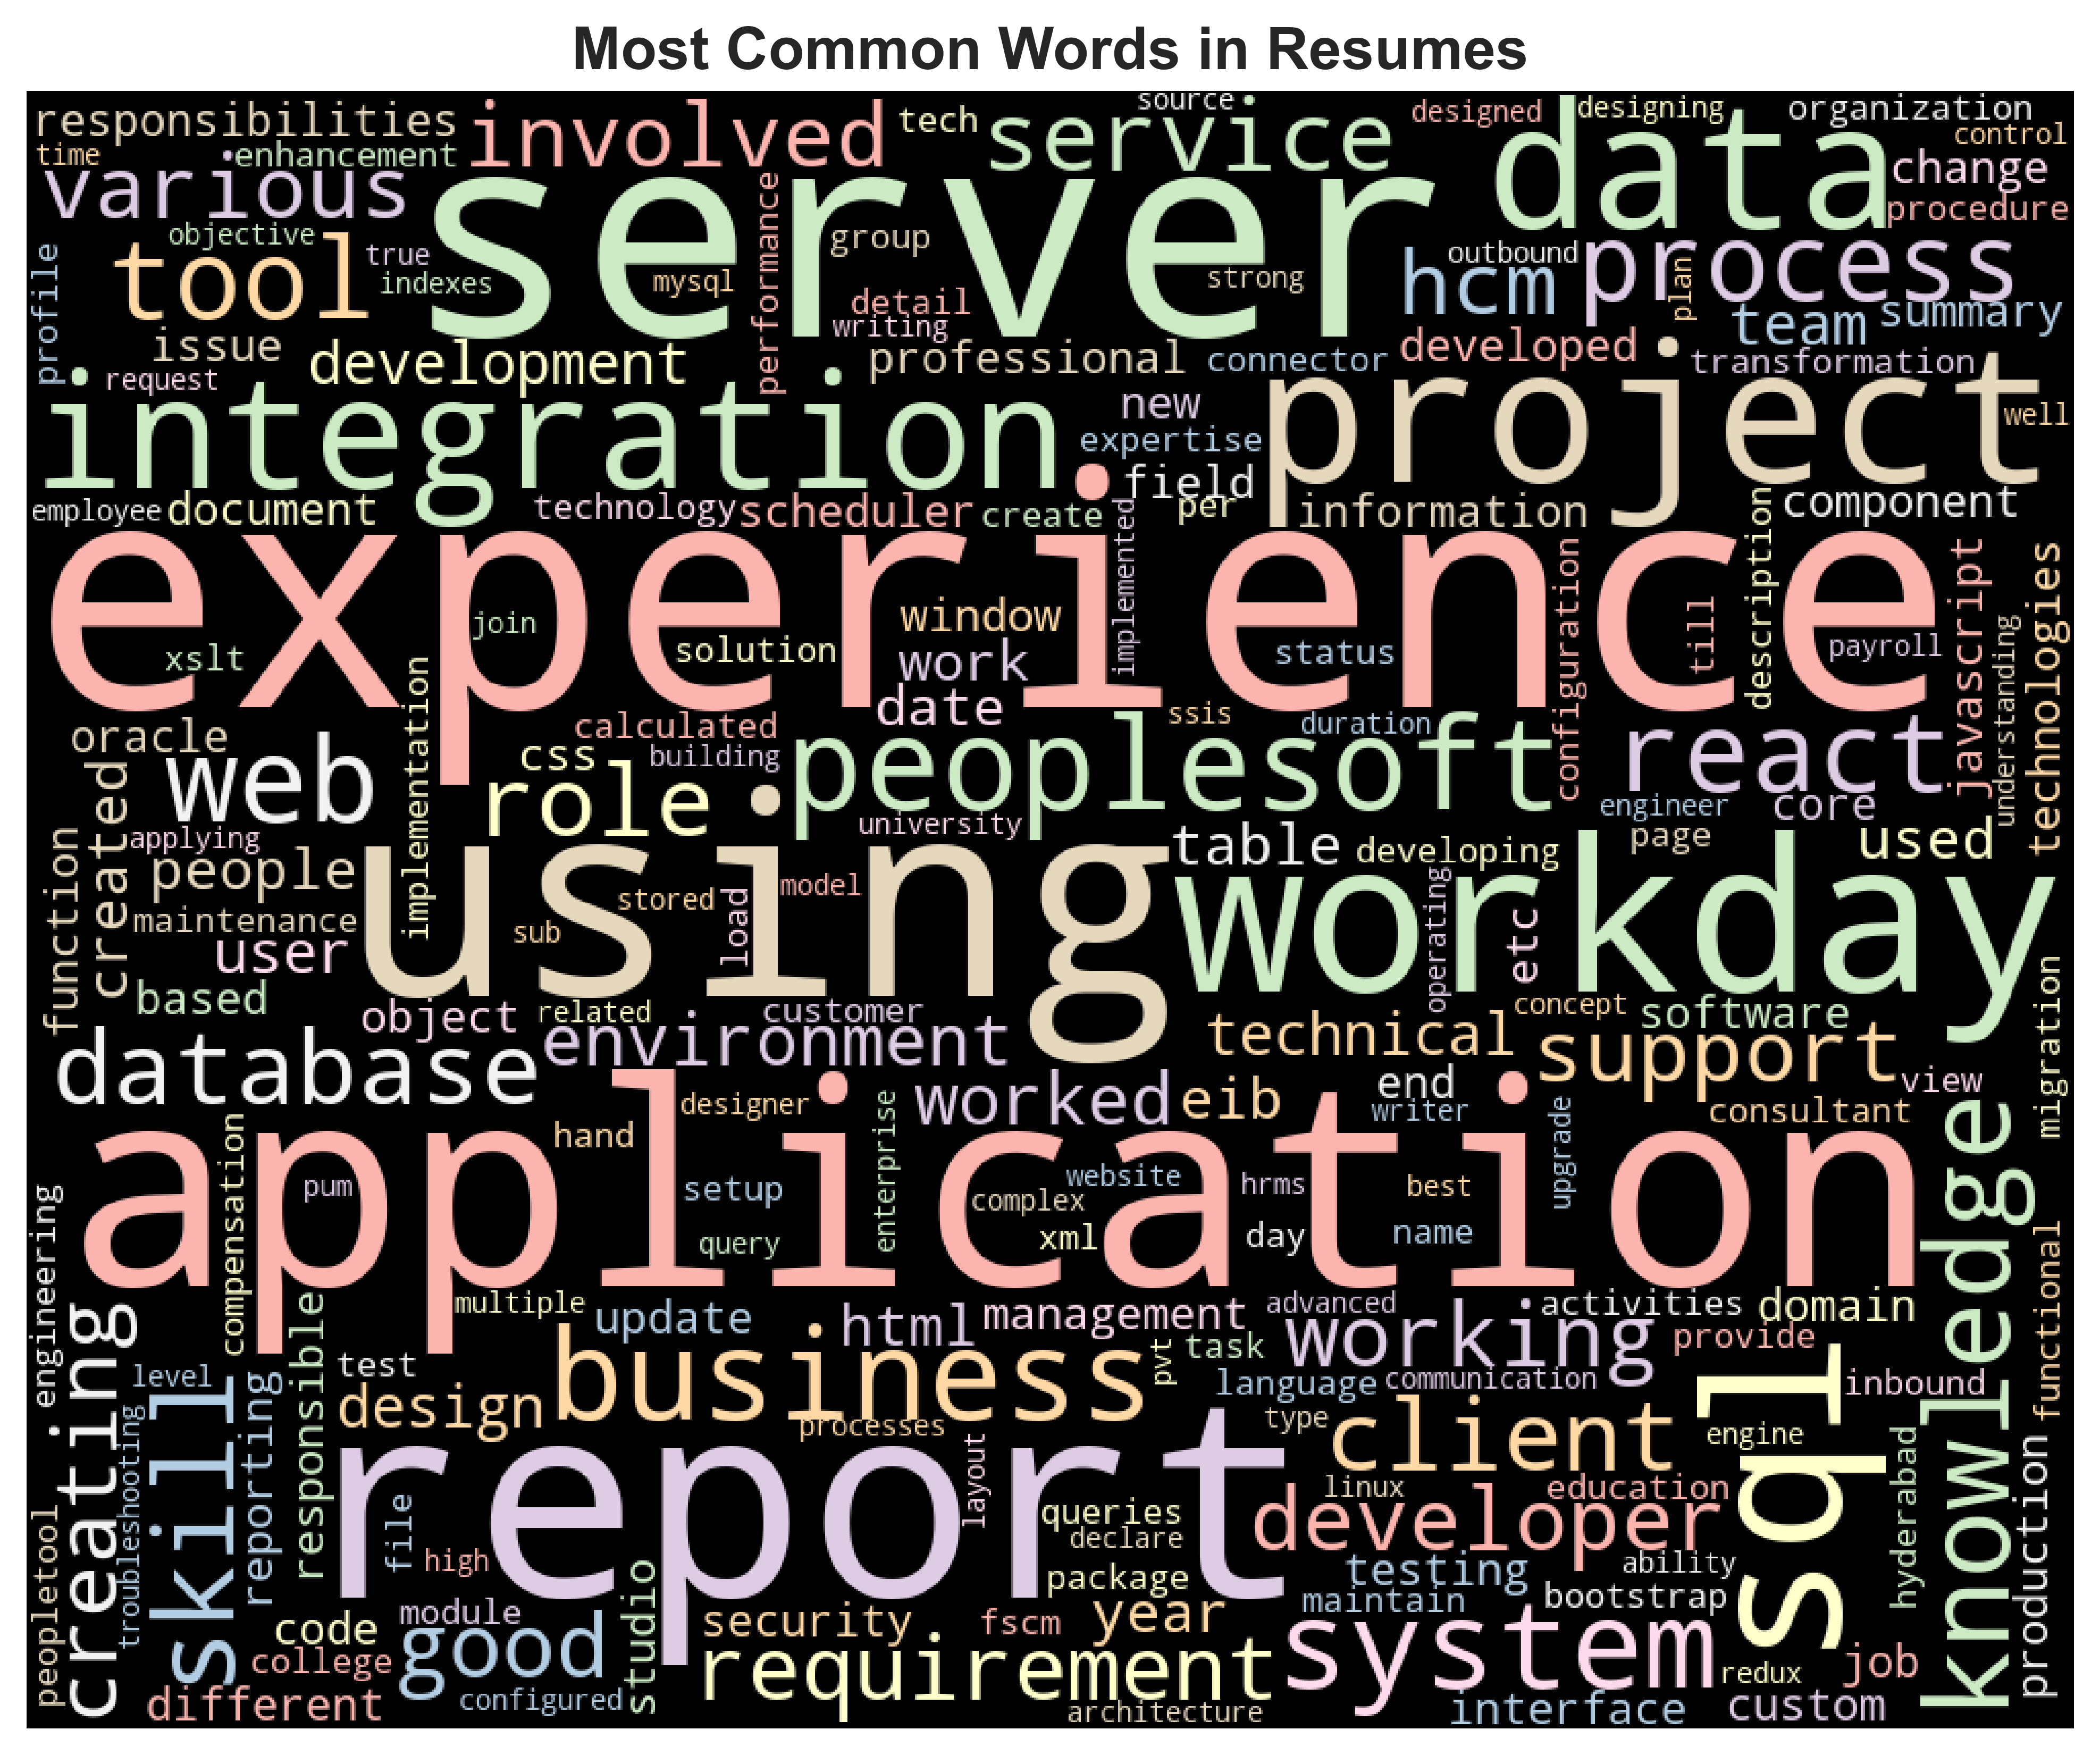

In [98]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds.png')
plt.show()

## ***MODEL BUILDING AND EVALUATION***

#### ***1. Import Library***

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

#### ***2. Import Dataset***

In [103]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Raw_Details,Resume_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...


#### ***3. Data Preprocessing***

##### ***3.1 LabelEncoder***

In [106]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Raw_Details,Resume_Details,LebelEncoding
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...,0
1,Peoplesoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...,0
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...,0
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...,0
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...,0
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...,0
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...,0
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...,0
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...,0
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...,0


In [107]:
resume_data.describe()

,LebelEncoding
count,52.000000
mean,1.442308
std,1.036840
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [108]:
resume_data.isnull().sum()

Category          0
Raw_Details       0
Resume_Details    0
LebelEncoding     0
dtype: int64

#### ***4.Model Building***

##### ***4.1 Train - Test Split***

In [111]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((39,), (13,))

##### ***4.2 TF-IDF Vectorization***

In [114]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [115]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [116]:
x_train.shape, x_test.shape

((39, 2721), (13, 2721))

In [117]:
print(y_train),print(y_test)

['React JS' 'Workday' 'SQL Developer' 'Peoplesoft' 'React JS' 'Peoplesoft'
 'SQL Developer' 'Peoplesoft' 'React JS' 'Peoplesoft' 'React JS'
 'Peoplesoft' 'React JS' 'React JS' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS' 'React JS' 'React JS' 'React JS' 'Peoplesoft'
 'React JS' 'React JS' 'Peoplesoft' 'SQL Developer' 'SQL Developer'
 'Workday' 'Workday' 'Workday' 'SQL Developer' 'React JS' 'Workday'
 'Peoplesoft' 'Workday' 'React JS' 'React JS' 'Workday' 'SQL Developer']
['Peoplesoft' 'React JS' 'Peoplesoft' 'Workday' 'React JS' 'SQL Developer'
 'React JS' 'Workday' 'SQL Developer' 'Workday' 'React JS' 'React JS'
 'SQL Developer']


(None, None)

#### ***5. Classification Models***

##### ***5.1 KNN Classifier***

In [120]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 1.00
Classification report for classifier KNeighborsClassifier():
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
     React JS       1.00      1.00      1.00         5
SQL Developer       1.00      1.00      1.00         3
      Workday       1.00      1.00      1.00         3

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00      1.00      1.00        13




##### ***5.2 Decision Tree Classifier***

In [122]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier DecisionTreeClassifier():
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
     React JS       1.00      0.80      0.89         5
SQL Developer       0.75      1.00      0.86         3
      Workday       1.00      1.00      1.00         3

     accuracy                           0.92        13
    macro avg       0.94      0.95      0.94        13
 weighted avg       0.94      0.92      0.92        13




##### ***5.3 Random Forest Classifier***

In [124]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
     React JS       1.00      1.00      1.00         5
SQL Developer       1.00      1.00      1.00         3
      Workday       1.00      1.00      1.00         3

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00      1.00      1.00        13




##### ***5.4 Support Vectore Machine (SVM) Classifier***

In [126]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier SVC():
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
     React JS       0.83      1.00      0.91         5
SQL Developer       1.00      0.67      0.80         3
      Workday       1.00      1.00      1.00         3

     accuracy                           0.92        13
    macro avg       0.96      0.92      0.93        13
 weighted avg       0.94      0.92      0.92        13




##### ***5.5 Logistic Regression***

In [128]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
     React JS       1.00      1.00      1.00         5
SQL Developer       1.00      1.00      1.00         3
      Workday       1.00      1.00      1.00         3

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00      1.00      1.00        13




##### ***5.6 Bagging Classifier***

In [130]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.82
Accuracy of  test set    : 0.85
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
               precision    recall  f1-score   support

   Peoplesoft       0.00      0.00      0.00         2
     React JS       1.00      1.00      1.00         5
SQL Developer       1.00      1.00      1.00         3
      Workday       0.60      1.00      0.75         3

     accuracy                           0.85        13
    macro avg       0.65      0.75      0.69        13
 weighted avg       0.75      0.85      0.79        13




##### ***5.7 AdaBoost Classifier***

In [132]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier AdaBoostClassifier(n_estimators=100):
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
     React JS       1.00      1.00      1.00         5
SQL Developer       1.00      1.00      1.00         3
      Workday       1.00      1.00      1.00         3

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00      1.00      1.00        13




##### ***5.8 Gradient Boosting Classifier***

In [134]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
     React JS       1.00      1.00      1.00         5
SQL Developer       1.00      1.00      1.00         3
      Workday       1.00      1.00      1.00         3

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00      1.00      1.00        13




##### ***5.9 Naive Bayes Classifier***

In [136]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
     React JS       1.00      1.00      1.00         5
SQL Developer       1.00      1.00      1.00         3
      Workday       1.00      1.00      1.00         3

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00      1.00      1.00        13




#### ***Model Evaluation***

In [138]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.974359,1.00,1.00,1.00,1.00
1,DecisionTree Classifier,1.000000,0.92,0.94,0.95,0.94
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,0.92,0.96,0.92,0.93
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
5,Bagging Classifier,0.820513,0.85,0.65,0.75,0.69
6,AdaBoost Classifier,1.000000,1.00,1.00,1.00,1.00
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [139]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

##### ***6.1 Train and Test Accuracy Plot***

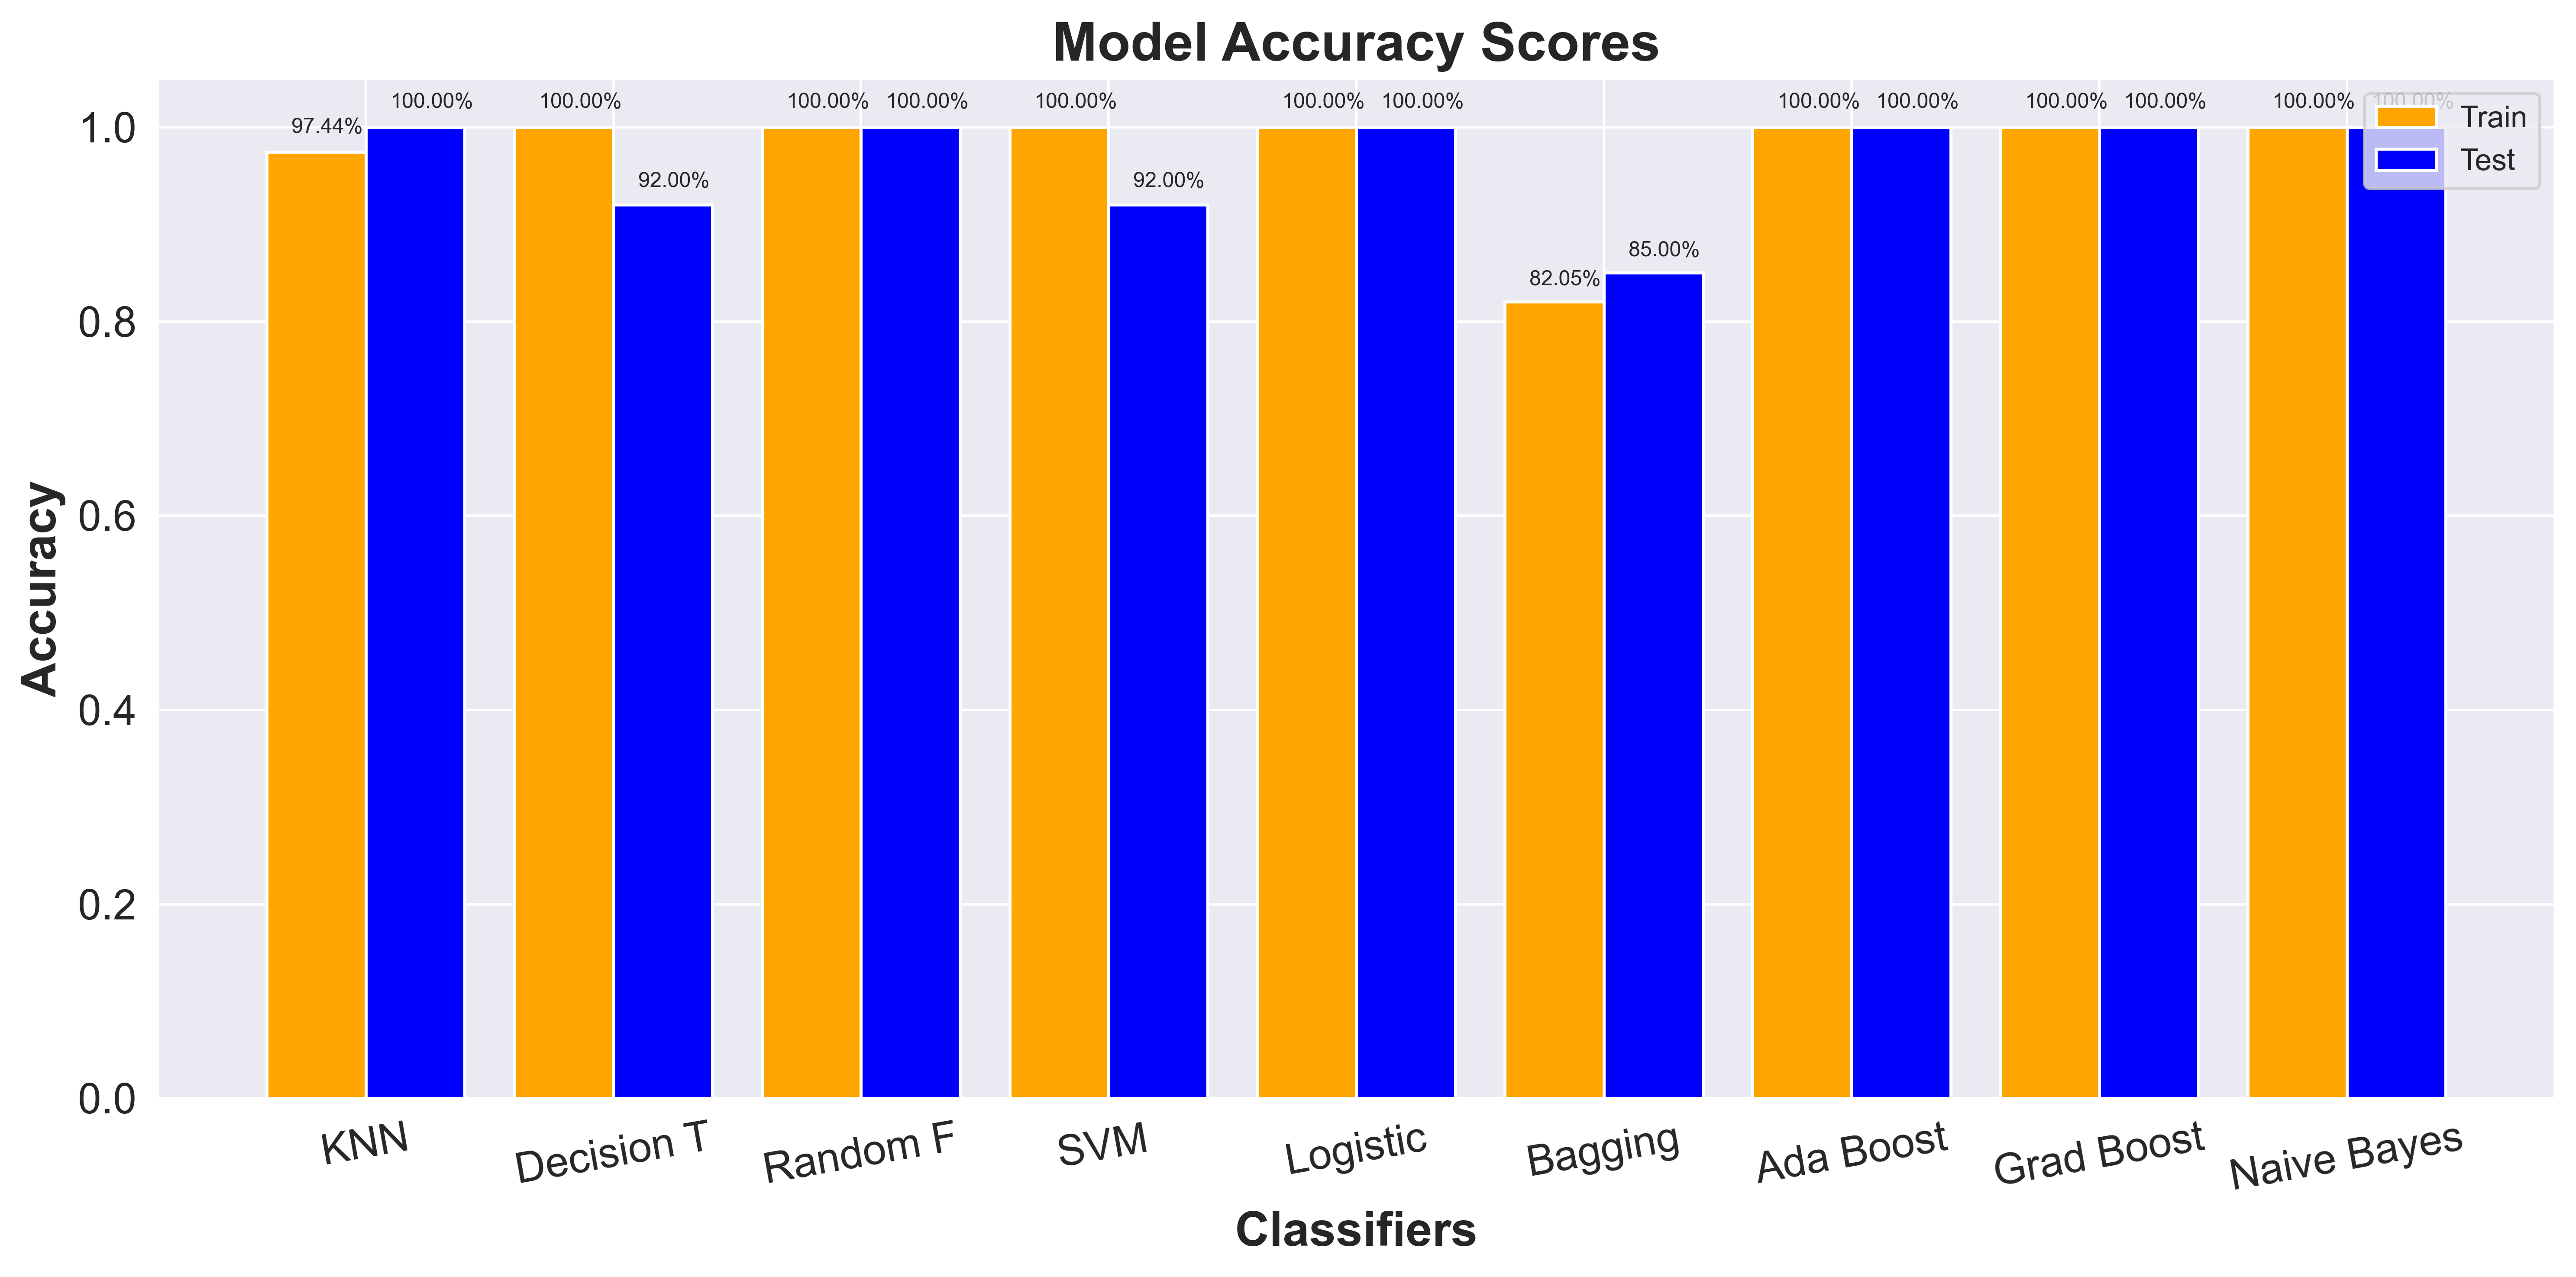

In [141]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

#### ***7. Model Deployment***

##### ***7.1 Pickle File***

In [144]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [145]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))

### _______________________________________________________________

# ***PROJECT CONCLUSION***

* In this project we have worked on resume classification, we were given resumes of different categories.Our goal was to classify resumes according to their categories and extract information from the resume through screening.

* We have performed necessary data exploration, text preprocessing, text visualization,feature extraction using count vectorizer,bag of words and explored different entities in the text using Named Entity Recognition.

* Using the spacy library we have found the most common words occuring in the corpus,built worclouds for the whole corpus and particular category from the corpus, we observed the top 10 most occuring words in corpus constituting bigrams and trigrams.

* After complete pipeline of Data exploration we initiated model building by encoding our category labels using label encoder,after encoding we have converted our data into vectors using TFIDF Vectorizer creating a sparse matrix.

* we split our resume data into train and test data with ratio 80:20,80% as training set and 20% as test set,with this we are ready to train our model.

* After splitting the data we have performed model training with classification algorithms and ensemble techniques ,using metrics like KFOLD- validation, confusion Matrix, classification report and accuracy score, we append all our categories of algorithms all at once.

* After observing the confusion matrix and classification report we observed that Random Forest handled well by giving the least missclassification and a excellent equvivalent accuracy with training and testing validation.we got a good score of 1 for precision, recall, F1- score and accuracy.

* After perfoming the evaluation matrix with optimal algorithms with selecting our random forest as final model we performed our predictions on our test data and we got final predictions and classified resumes according to their categories by mapping according to encoded labels.

* After classifying resumes according to categories, we created a predictive system with resume parser techniques and extracted information from the input resume and fit in a dataframe.

* To conclude resume classification or resume screening is a technique to reduce the human effort in human resource management and extract resume with higher level accuracy,In this project we found out the importance of resume screening and how well an ATS system functions.